<a href="https://colab.research.google.com/github/daonly/2024Spring/blob/main/%5BSW%5D%20MERS_Tweets_%2BComments_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
a = np.array([1,2,3])
a

array([1, 2, 3])

# 새 섹션

In [ ]:
mat = np.zeros((4,3))
mat

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
norm_list = np.random.randn(100)
norm_list

array([-1.62835745,  0.77420775, -1.54113841, -0.25413045, -0.2837974 ,
        0.38986003,  0.03959201,  0.08853887, -0.94190201,  1.44421269,
       -0.27203949, -0.4556575 , -2.41222792, -0.79662357,  0.07306657,
        0.96679181,  0.22230515,  0.78772588,  2.78005319,  0.23320084,
       -0.21969778, -2.54808993,  0.01812843,  0.49258742, -1.39113377,
        0.39744501,  1.6796707 ,  0.04088427, -1.00580376,  1.52345082,
        0.71294481,  0.57850413,  0.29092304,  0.04305008, -1.16889183,
       -0.69178509, -0.69279582, -0.76268655,  0.58125913, -0.55953021,
       -0.22568596,  0.36725288, -1.26266693, -0.10617153, -0.37038546,
       -0.54497877,  0.17882281,  1.80392486,  1.1668004 , -1.43671244,
       -1.67468709, -0.60642271, -0.4136305 , -2.4855516 , -2.30794934,
        1.48264162,  0.1417915 , -0.72980268, -0.18732205,  0.91277284,
        1.01533329,  0.96382926, -1.5525931 ,  0.1414632 , -0.09095483,
       -0.6306113 ,  0.36369943, -1.89778174,  0.35495698,  0.93

In [ ]:
from matplotlib import pyplot as plt
import io
import hashlib

b = io.BytesIO()

영양성분 = ['탄수화물', '단백질', '지방']
cal = [2.7*4, 26.6*4, 1.4*9]

print(cal)
########################################

plt.savefig(b, format = 'png')
print(hashlib.sha256(b.getvalue()).hexdigest())

[10.8, 106.4, 12.6]
735a333d464c844977ad6c530691c08e46e9ab08950b96a273e2c11ceb557d93


<Figure size 640x480 with 0 Axes>

<ipython-input-7-57aab32a57de>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(norm_list)


<Axes: ylabel='Density'>

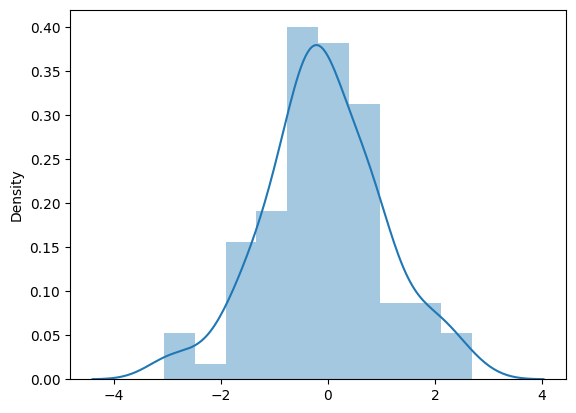

In [ ]:
import seaborn as sns
sns.distplot(norm_list)

In [ ]:
#한글폰트사용법:https://datascienceschool.net/view-notebook/d0b1637803754bb083b5722c9f2209d0/
#colab에서 사용하려면
!apt -qq -y install fonts-nanum
#런타임 재실행
#mpl.rc('font', family='NanumBarunGothic')

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


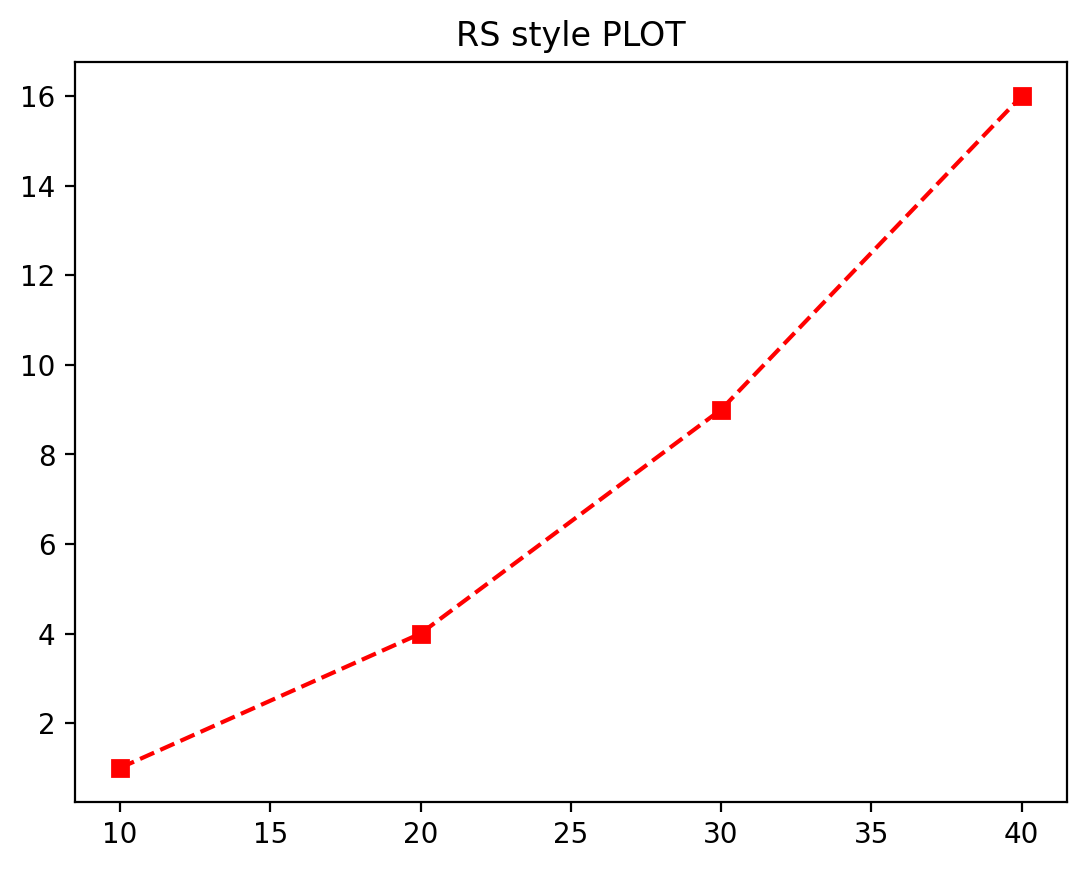

In [ ]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.title("RS style PLOT")
plt.plot([10, 20, 30, 40], [1, 4, 9, 16], 'rs--')
plt.show()

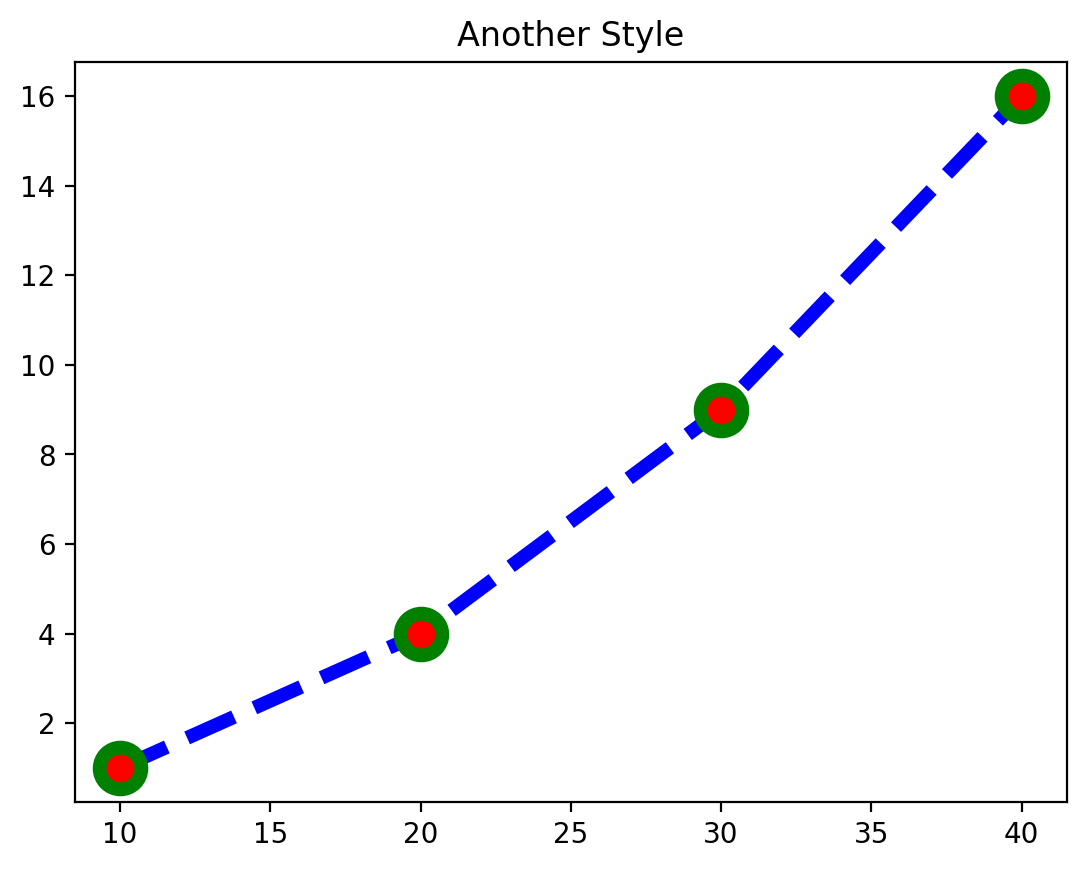

In [ ]:
%config InlineBackend.figure_format = 'retina'
plt.plot([10, 20, 30, 40], [1, 4, 9, 16], c="b",
         lw=5, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r")
plt.title("Another Style")
plt.show()

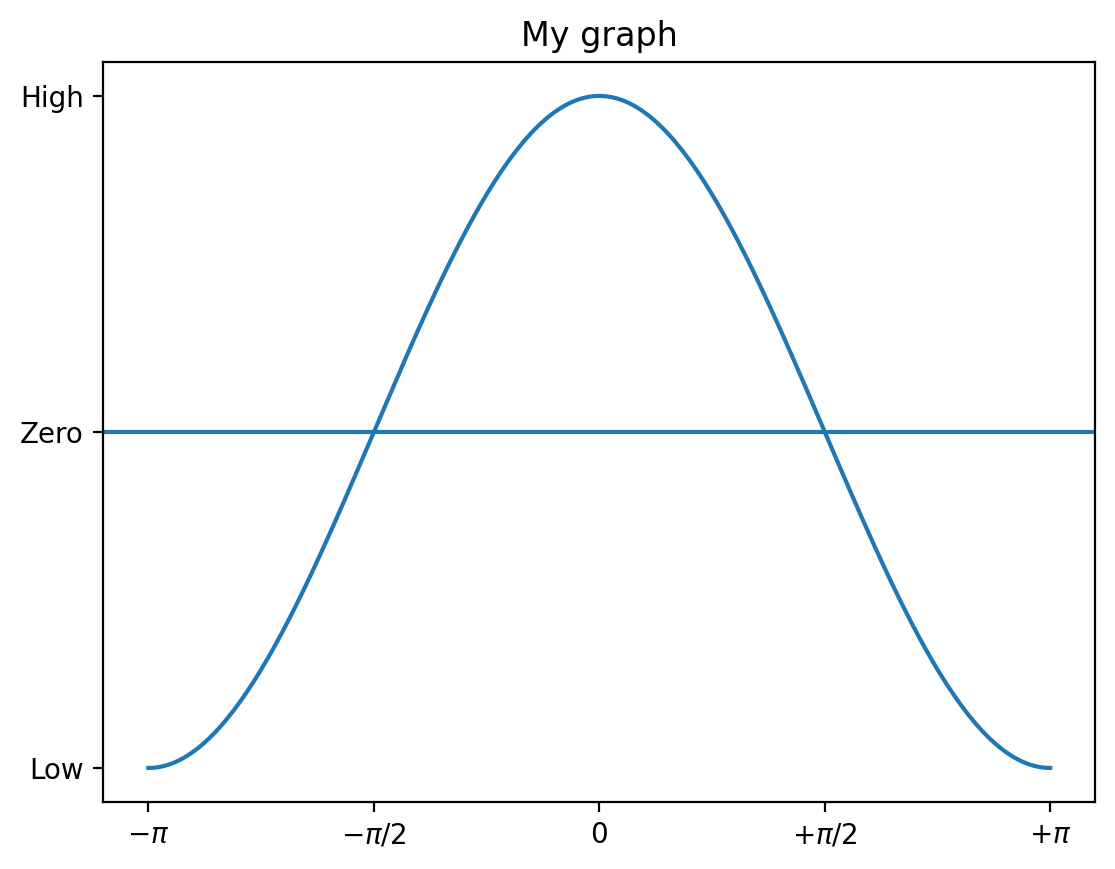

In [ ]:
%config InlineBackend.figure_format = 'retina'
X = np.linspace(-np.pi, np.pi, 256)
C = np.cos(X)
plt.title("My graph")
plt.plot(X, C)
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, 1], ["Low", "Zero", "High"])
plt.axhline(0)
plt.grid(False)
plt.show()

# **MERS TEXT DATA**

In [ ]:
import pandas as pd
import numpy as np
#konlpy 설치 한국어 형태소 분석기
!pip3 install konlpy
from konlpy.tag import Okt
okt = Okt()

In [ ]:
df = pd.read_excel('mers_20150501~20150531.xlsx') # 메르스 데이터를 데이터 프레임으로 불러들이기

In [ ]:
len(df) # 자료의 길이

75760

In [ ]:
df = df.sample(5000) #5000개만 샘플링하기
df.head()
#df.tail()

,스크린네임,USRID,TWEETID,속성,트윗,작성일,팔로잉,팔로워,REPLYID,URL
2293,hwangara,8.225855e+07,6.049674e+17,RT,RT @cenjust: 문재인 대표. 질병관리본부 방문 '메르스 확산 적극대응 당부...,2.015053e+13,977.0,1134.0,6.049537e+17,http://twitter.com/82258548/status/60496738921...
47641,flowersbless,3.163850e+09,6.041743e+17,TWEET,뭐 이번 메르스 사태에서 우리나라 사람들의 인식이 바뀌길 기대하는건 어려워 보이네요...,2.015053e+13,420.0,264.0,-1.000000e+00,http://twitter.com/3163850424/status/604174283...
40146,kspirit2000,1.825741e+08,6.066788e+17,RT,RT @pastecat: 메르스 질병 해결방법 pic.twitter.com/K0JF...,2.015053e+13,482.0,411.0,6.042605e+17,http://twitter.com/182574082/status/6066788300...
71344,adriana6412,1.286055e+09,6.037186e+17,RT,RT @yonhaptweet: 내국인 메르스 의심환자 중국으로 출국(1보) http...,2.015053e+13,281.0,135.0,6.037064e+17,http://twitter.com/1286055049/status/603718617...
10815,ricecake_bread,1.121118e+08,6.052089e+17,RT,RT @mindgood: 메르스 관련 발표기사에 달린 촌철살인의 댓글들. pic.t...,2.015053e+13,456.0,322.0,6.047845e+17,http://twitter.com/112111769/status/6052088687...


In [ ]:
df.columns #df 라는 데이터의 컬럼의 이름들 확인하기

Index(['스크린네임', 'USRID', 'TWEETID', '속성', '트윗', '작성일', '팔로잉', '팔로워', 'REPLYID',
       'URL'],
      dtype='object')

In [ ]:
df_tw = df[ df['속성']=='TWEET' ]

In [ ]:
len(df_tw)

949

In [ ]:
import re
def clean_str(text):
    if text == np.nan:
        return ''
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '\n'         #줄바꿈제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    return text

In [ ]:
#nan값이 있는 행 제거
df = df.dropna(axis=0)

#tweetid를 정수형으로 변경
df = df.astype(
    {'TWEETID':int,
    'USRID':int,
    '작성일':int,
     'REPLYID':int
    }
         )

In [ ]:
df_rt  = df[df['속성']=='RT']
len(df_rt)

3960

In [ ]:
df_rt = df_rt.astype({'REPLYID':int})

In [ ]:
df['text'] = df['트윗'].apply(clean_str)
df['text'].head()

2293     RT  cenjust  문재인 대표  질병관리본부 방문  메르스 확산 적극대응 당부...
47641    뭐 이번 메르스 사태에서 우리나라 사람들의 인식이 바뀌길 기대하는건 어려워 보이네요...
40146    RT  pastecat  메르스 질병 해결방법 pic twitter com K0JF...
71344    RT  yonhaptweet  내국인 메르스 의심환자 중국으로 출국 1보    zI...
10815    RT  mindgood  메르스 관련 발표기사에 달린 촌철살인의 댓글들  pic t...
Name: text, dtype: object

In [ ]:
#데이터에서 리트윗 수를 분포를 어떻게 측정할 수 있을까? - reply id가 같은 것들
rt_counts = df_rt['REPLYID'].value_counts()

<ipython-input-32-7134685651ca>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rt_counts.values, hist=False)


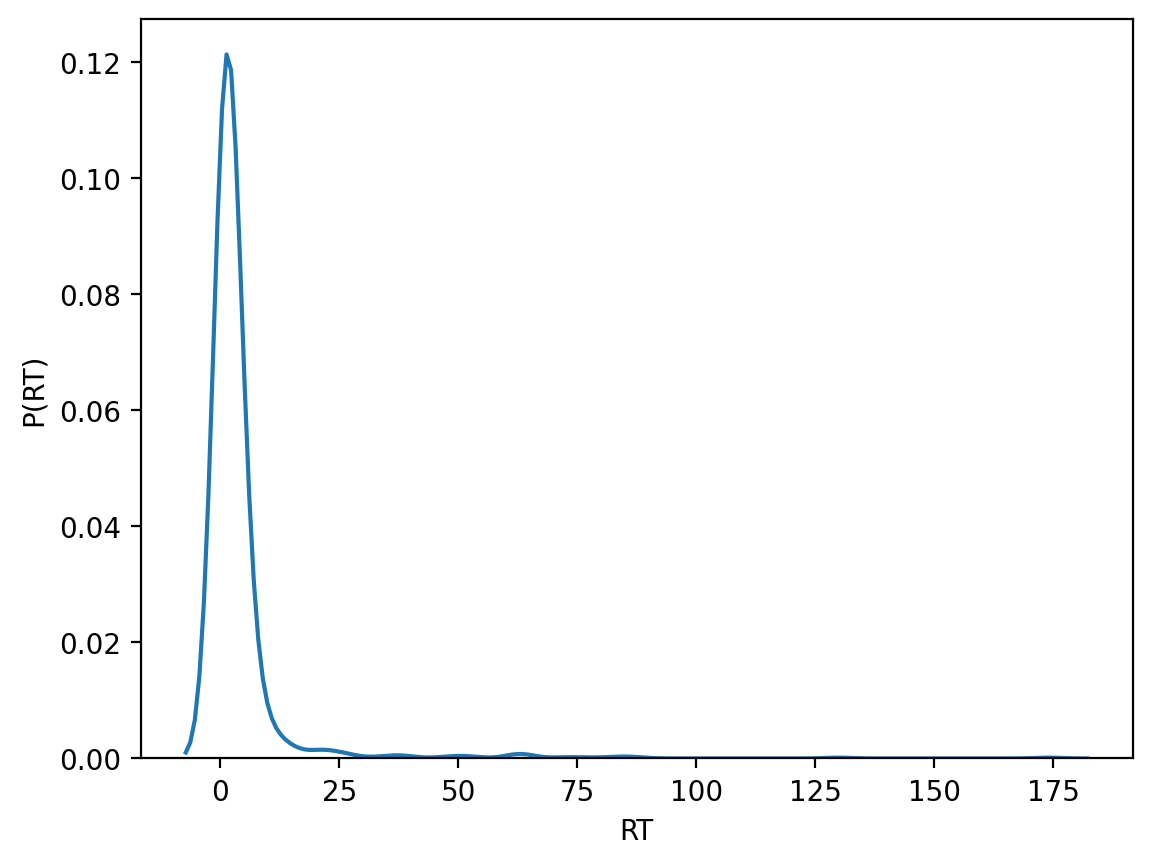

In [ ]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
sns.distplot(rt_counts.values, hist=False)
plt.xlabel('RT')
plt.ylabel('P(RT)')
plt.show()

Text(0, 0.5, 'Frequency')

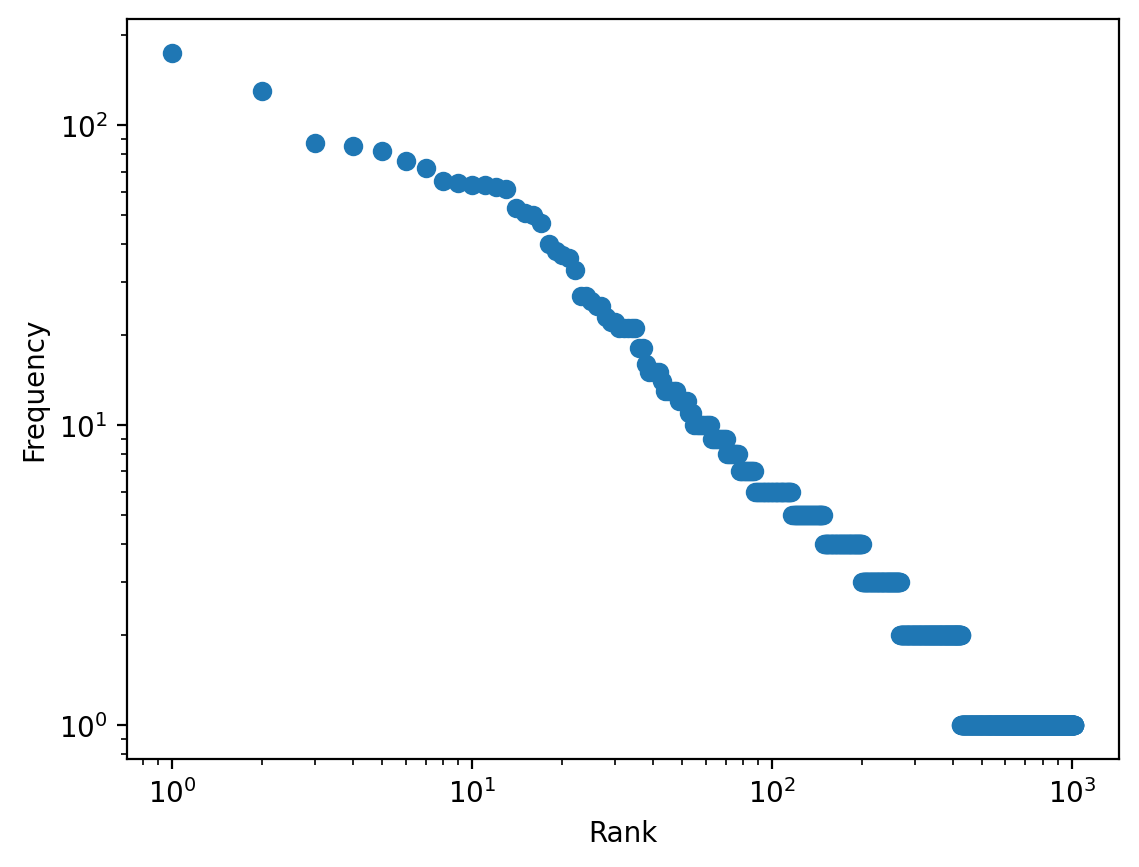

In [ ]:
%config InlineBackend.figure_format = 'retina'
rt_counts.values
len(rt_counts)
x = np.arange(1,len(rt_counts)+1)
plt.plot(x, rt_counts.values, 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rank')
plt.ylabel('Frequency')

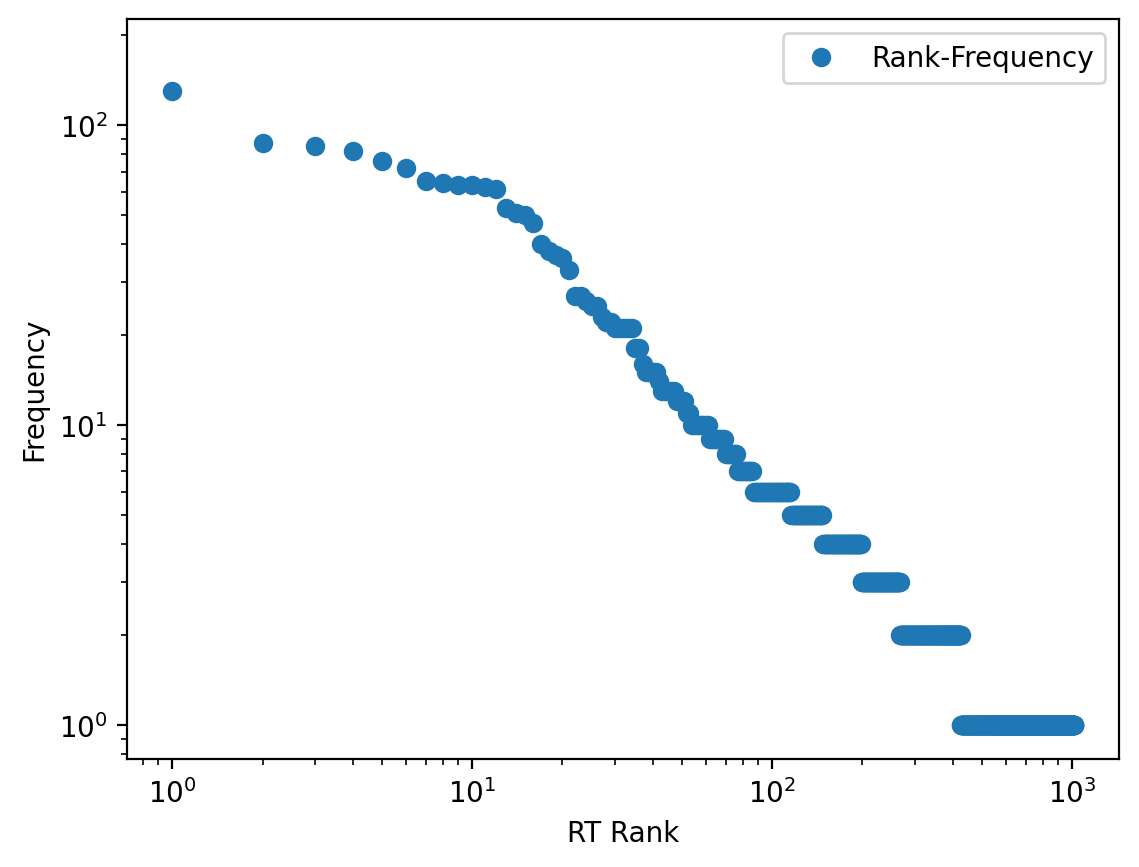

In [ ]:
%config InlineBackend.figure_format = 'retina' #그래프quality향상
plt.loglog(rt_counts.values, 'o', label='Rank-Frequency')
plt.xlabel('RT Rank')
plt.ylabel('Frequency')
plt.legend()
plt.show()

상위 빈도 단어 n개 추출

In [ ]:
df['text'] = df['트윗'].apply(clean_str)
df['text'].head()

2293     RT  cenjust  문재인 대표  질병관리본부 방문  메르스 확산 적극대응 당부...
47641    뭐 이번 메르스 사태에서 우리나라 사람들의 인식이 바뀌길 기대하는건 어려워 보이네요...
40146    RT  pastecat  메르스 질병 해결방법 pic twitter com K0JF...
71344    RT  yonhaptweet  내국인 메르스 의심환자 중국으로 출국 1보    zI...
10815    RT  mindgood  메르스 관련 발표기사에 달린 촌철살인의 댓글들  pic t...
Name: text, dtype: object

In [ ]:
from konlpy.tag import Kkma
kkma = Kkma()

In [ ]:
def to_nouns(text):
    text_pos = kkma.pos(text)
    noun_text = []
    for a,b in text_pos:
        if len(a) > 1: #한글자 이상
            if "NN" in b: #명사 추출
                noun_text.append(a)
    return noun_text

In [ ]:
from tqdm import tqdm

In [ ]:
noun_texts = []

for e in tqdm(df['text']):
  nouns = to_nouns(e)

  if len(nouns) > 0:
    noun_texts.append(nouns)

100%|██████████| 5000/5000 [03:50<00:00, 21.65it/s]


In [ ]:
#단어수 통계
all_texts = []
for e in noun_texts:
  for t in e:
    all_texts.append(t)

In [ ]:
pd.Series(all_texts).value_counts().head(10)

환자     2295
감염     1163
병원      706
정부      613
격리      583
감염자     556
의심      552
중동      524
중국      513
발생      469
Name: count, dtype: int64

# **학생 코멘트 분석: 도연 조교님 감사합니다!**

지난 시간의 예고대로 저희 분반 학생님들의 수업 코멘트 내용을 분석해보겠습니다!

In [ ]:
import pandas as pd
import numpy as np

#konlpy 설치 한국어 형태소 분석기
!pip3 install konlpy
from konlpy.tag import Okt
okt = Okt()

In [ ]:
df = pd.read_excel('weekly_comments.xlsx')  # 실습 7에서 배운대로 데이터 파일을 불러옵니다.
# df 파일이 수업 코멘트로 바뀝니다!
df.head() # 어떻게 생긴 건지 확인부터 해볼까요?

,week,학과,코딩 경험 유무,comment
0,1,불어불문학과,N,중문과 선배님의 이야기를 통해서 문과임에도 자신이 하고싶은 다양한 일을 할 수 있음...
1,1,언어학과,N,외고 출신 카이스트생이 신기했습니다.
2,1,중어중문과,N,"교수님께서 되게 재밌으실 것 같아서, 앞으로의 수업이 기대됩니다."
3,1,언어학과,Y,문과대생인데 코딩을 배워야 하는 이유를 얘기해주셔서 좋았습니다. 열심히 수업 참여하...
4,1,언어학과,N,교수님께서 위트있으시고 5번질문에 대한 함정이 있는게 정말 놀라웠습니다.


In [ ]:
df.isnull().sum() # 결측치가 있는지 확인해봐야 할 것 같습니다!
# 거의 모든 학생분들께서 값을 채워넣어주셨지만,
# 코멘트를 안 달아주신 분들도 계시군요.

week        0
학과          0
코딩 경험 유무    0
comment     4
dtype: int64

In [ ]:
df_comment = df.dropna(axis=0)  # 별도로 결측치가 없는 데이터 프레임을 구성합니다.
comment = ' '.join(df_comment['comment'])

In [ ]:
# 한국어 분석은 별도의 모듈과 라이브러리를 필요로 합니다.
# 띄어쓰기로만 분리하기엔 너무 복잡하기 때문이죠..

import os
from konlpy.tag import Okt  # 형태소 단위로 분석해줄 친구를 불러옵니다.
from collections import Counter # 한 단어가 몇 번 나오는지 세줄 친구도 필요합니다.

In [ ]:
# Okt()로 형태소 분석 객체를 생성합니다. Okt(Open Korean Text)는
# 트위터에서 만든 오픈소스 한국어 처리기입니다
okt = Okt()

# 형태소를 분류하고 확인하기 위한 빈 리스트를 만듭니다.
sentences_tag = []

morph = okt.pos(comment)  # 텍스트에 대해 형태소 분석을 실시합니다.
sentences_tag.append(morph) # 만들어둔 빈 리스트에 분석 결과를 넣습니다.

In [ ]:
# 필요한 품사만 추출해봅니다. (명사를 bucket list에 담기)
bucket_list = []
for my_sentence in sentences_tag:
  for word, tag in my_sentence:
    if tag in ['Noun']:
      bucket_list.append(word)

In [ ]:
# 단어 빈도수 구하기
# 각 원소의 출현 횟수를 계산하는 Counter 모듈을 활용합니다.
from collections import Counter
counts = Counter(bucket_list)
# print(counts)

In [ ]:
# 명사 빈도 순서대로 상위 30개를 출력합니다.
print(counts.most_common(30))

[('것', 2489), ('인상', 1729), ('코딩', 1565), ('수', 1502), ('수업', 1276), ('교수', 1046), ('생각', 986), ('점', 604), ('파이썬', 468), ('코드', 429), ('더', 407), ('때', 393), ('대해', 376), ('오늘', 360), ('처음', 350), ('알', 318), ('게', 318), ('이해', 313), ('내용', 311), ('복습', 296), ('학생', 274), ('함수', 273), ('직접', 267), ('말씀', 267), ('시간', 261), ('부분', 250), ('조금', 239), ('통해', 224), ('저', 224), ('사용', 212)]


In [ ]:
import pandas as pd
import plotly.express as px
%config InlineBackend.figure_format = 'retina' #그래프quality향상

# 앞서 만든 예제처럼 데이터프레임을 구성합니다.

df = pd.DataFrame(counts.most_common(30), columns=["단어", "빈도수"])
fig = px.treemap(df,
                 path=["단어"],
                 values="빈도수",
                 title="학생 주간 코멘트 상위 30") # 제목 지정
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px
%config InlineBackend.figure_format = 'retina' #그래프quality향상

df = pd.DataFrame(counts.most_common(50), columns=["단어", "빈도수"])

fig = px.treemap(df,
                 path=["단어"],
                 values="빈도수",
                 title="학생 주간 코멘트 상위 50") # 제목 지정
fig.show()

In [ ]:
df.head() #지금까지 df 라는 데이터 파일은 계속 변형되었습니다!
#df.tail()

,단어,빈도수
0,것,2489
1,인상,1729
2,코딩,1565
3,수,1502
4,수업,1276


**주차별 상위 빈도 테이블 만들기 나영조교님 감사합니다!**

In [ ]:
df = pd.read_excel('weekly_comments.xlsx')  # 다시 데이터 파일을 불러옵니다.
# df 파일이 수업 코멘트로 바뀝니다!
df.head() # 어떻게 생긴 건지 확인부터 해볼까요?

,week,학과,코딩 경험 유무,comment
0,1,불어불문학과,N,중문과 선배님의 이야기를 통해서 문과임에도 자신이 하고싶은 다양한 일을 할 수 있음...
1,1,언어학과,N,외고 출신 카이스트생이 신기했습니다.
2,1,중어중문과,N,"교수님께서 되게 재밌으실 것 같아서, 앞으로의 수업이 기대됩니다."
3,1,언어학과,Y,문과대생인데 코딩을 배워야 하는 이유를 얘기해주셔서 좋았습니다. 열심히 수업 참여하...
4,1,언어학과,N,교수님께서 위트있으시고 5번질문에 대한 함정이 있는게 정말 놀라웠습니다.


In [ ]:
df.head()
#df.tail()

,week,학과,코딩 경험 유무,comment
0,1,불어불문학과,N,중문과 선배님의 이야기를 통해서 문과임에도 자신이 하고싶은 다양한 일을 할 수 있음...
1,1,언어학과,N,외고 출신 카이스트생이 신기했습니다.
2,1,중어중문과,N,"교수님께서 되게 재밌으실 것 같아서, 앞으로의 수업이 기대됩니다."
3,1,언어학과,Y,문과대생인데 코딩을 배워야 하는 이유를 얘기해주셔서 좋았습니다. 열심히 수업 참여하...
4,1,언어학과,N,교수님께서 위트있으시고 5번질문에 대한 함정이 있는게 정말 놀라웠습니다.


In [ ]:
df.columns #df 라는 데이터의 컬럼의 이름들 확인하기

Index(['week', '학과', '코딩 경험 유무', 'comment'], dtype='object')

In [ ]:
# 각 주차별로 상위 50개 단어를 표로 작성해서 저장합니다
weeks = [1, 2, 3, 4, 5, 6, 7, 9, 10]
comments = {}

for week_num in weeks:
    comments_list = df[df['week'] == week_num]['comment']

    top_words = []
    for comment in comments_list:
        if isinstance(comment, str):
            morphs = okt.pos(comment)
            for word, pos in morphs:
                if pos in ['Noun', 'Verb', 'Adjective'] and word not in 'stopwords.txt':
                    top_words.append(word)

    top_words_count = Counter(top_words)
    top_words = top_words_count.most_common(50)
    comments[week_num] = top_words

all_weeks_df = pd.DataFrame()

for week, words in comments.items():
    week_df = pd.DataFrame(words, columns=[f'Week_{week}_Word', f'Week_{week}_Count'])
    all_weeks_df = pd.concat([all_weeks_df, week_df], axis=1)

all_weeks_df.to_excel('top_words.xlsx', index=False)

print("Results have been saved")

Results have been saved


In [ ]:
# 각 주차별로 상위 20개 단어를 표로 작성해서 저장합니다
from collections import Counter
weeks = [1, 2, 3, 4, 5, 6, 7, 9, 10]
comments ={}

for week_num in weeks:
    comments_list = df[df['week'] == week_num]['comment']
    comments[week_num] = comments_list

    top_words = []

    top_words_count = Counter(top_words)
    top_20_words = top_words_count.most_common(20)
    comments[week_num] = top_20_words

print(top_20_words)
all_weeks_df.to_excel('top_20_words.xlsx', index=False)

print("Results have been saved")

[]
Results have been saved


# **예람 조교님의 코멘트 군집화**

** 보너스 코드이니, 반드시 숙지해야한다는 부담 갖지 않으셔도 됩니다!**

(5448, 4)
(5448, 199)
   if else  가장 기억에  가장 기억에 남습니다  가장 인상  가장 인상 깊었습니다  가장 인상깊었습니다  가장 인상적이었습니다  \
0        0       0            0      0            0           0            0   
1        0       0            0      0            0           0            0   
2        0       0            0      0            0           0            0   
3        0       0            0      0            0           0            0   
4        0       0            0      0            0           0            0   
5        0       0            0      0            0           0            0   
6        0       0            0      0            0           0            0   
7        0       0            0      0            0           0            0   
8        0       0            0      0            0           0            0   
9        0       0            0      0            0           0            0   

   갑자기 난이도가  같다는 생각이  같다는 생각이 들었습니다  ...  파이썬 코드가  파이썬 코드를  파이썬에 대해  파이썬을 처음  \
0         0      

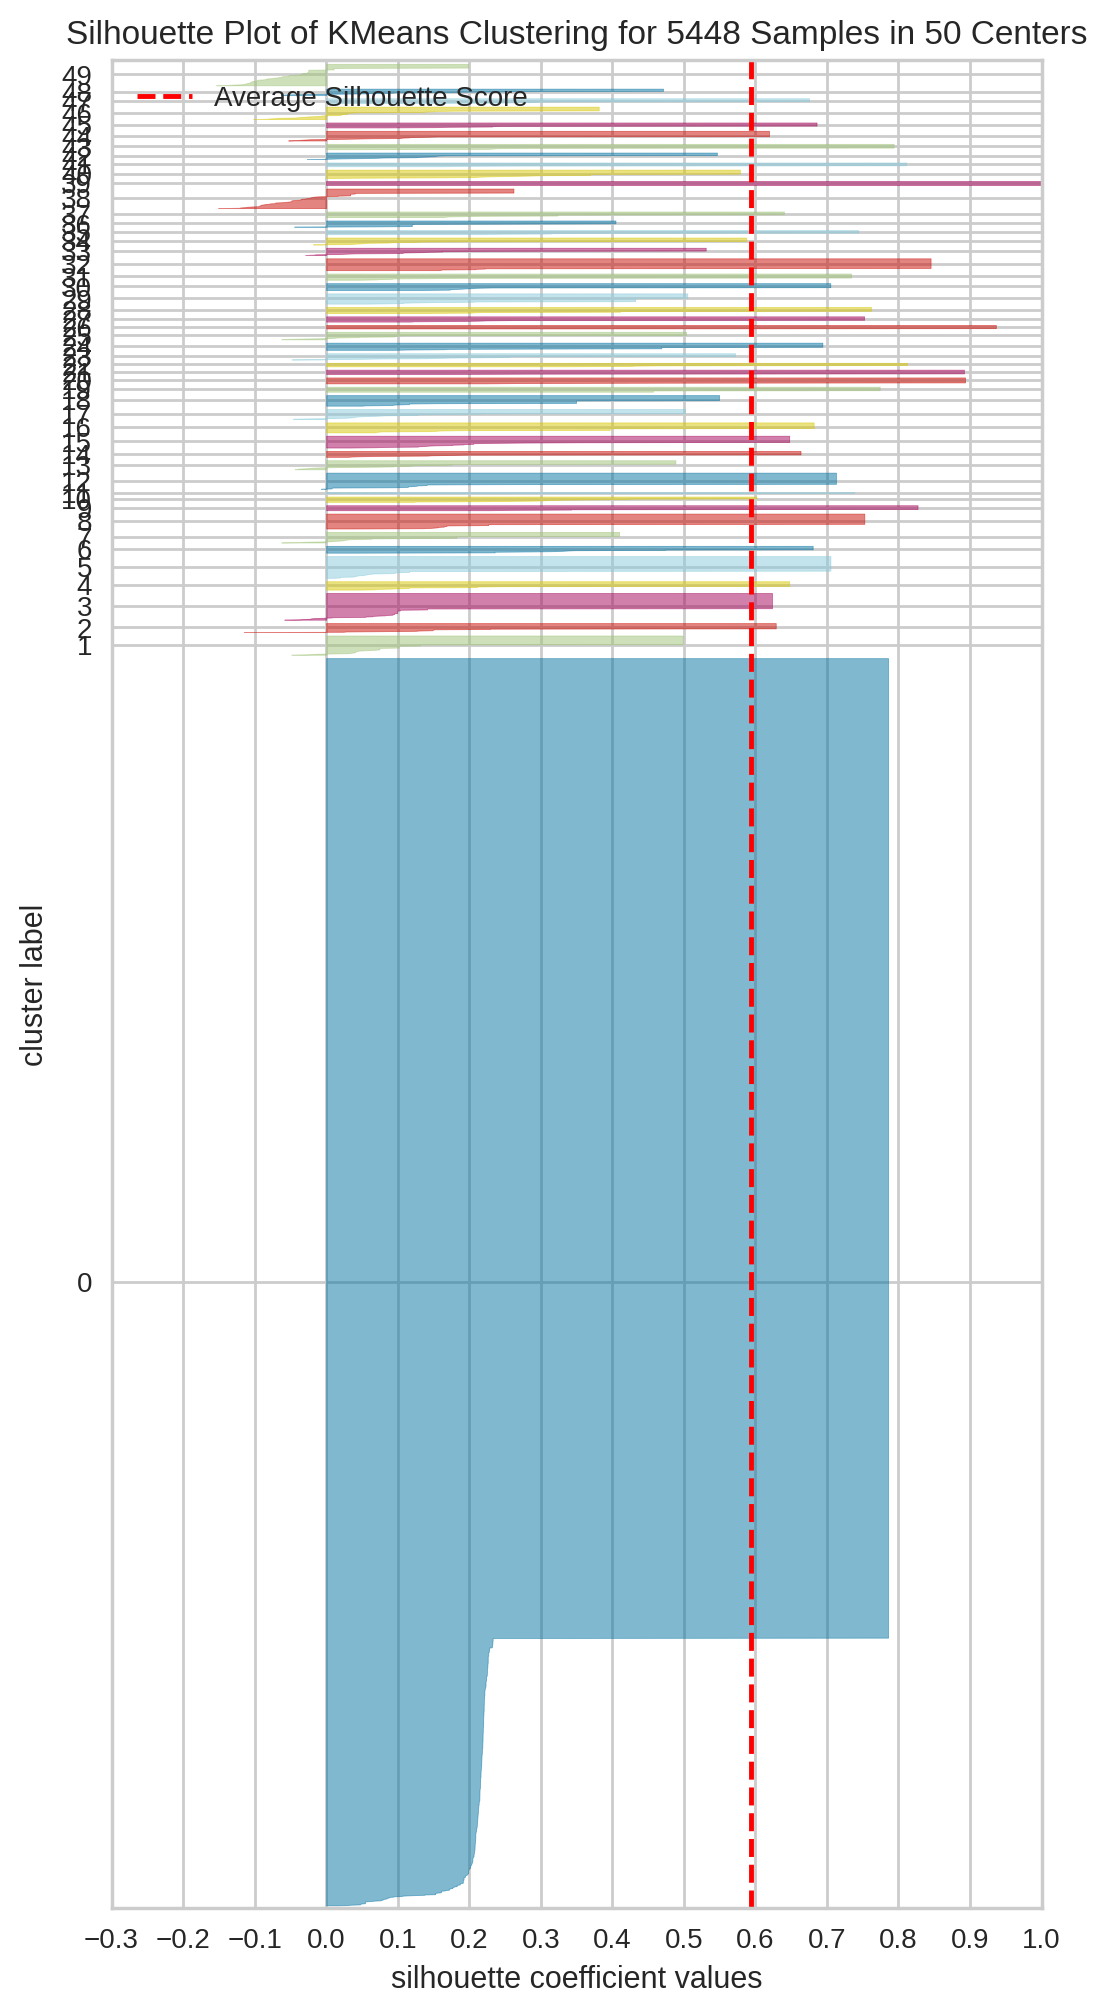

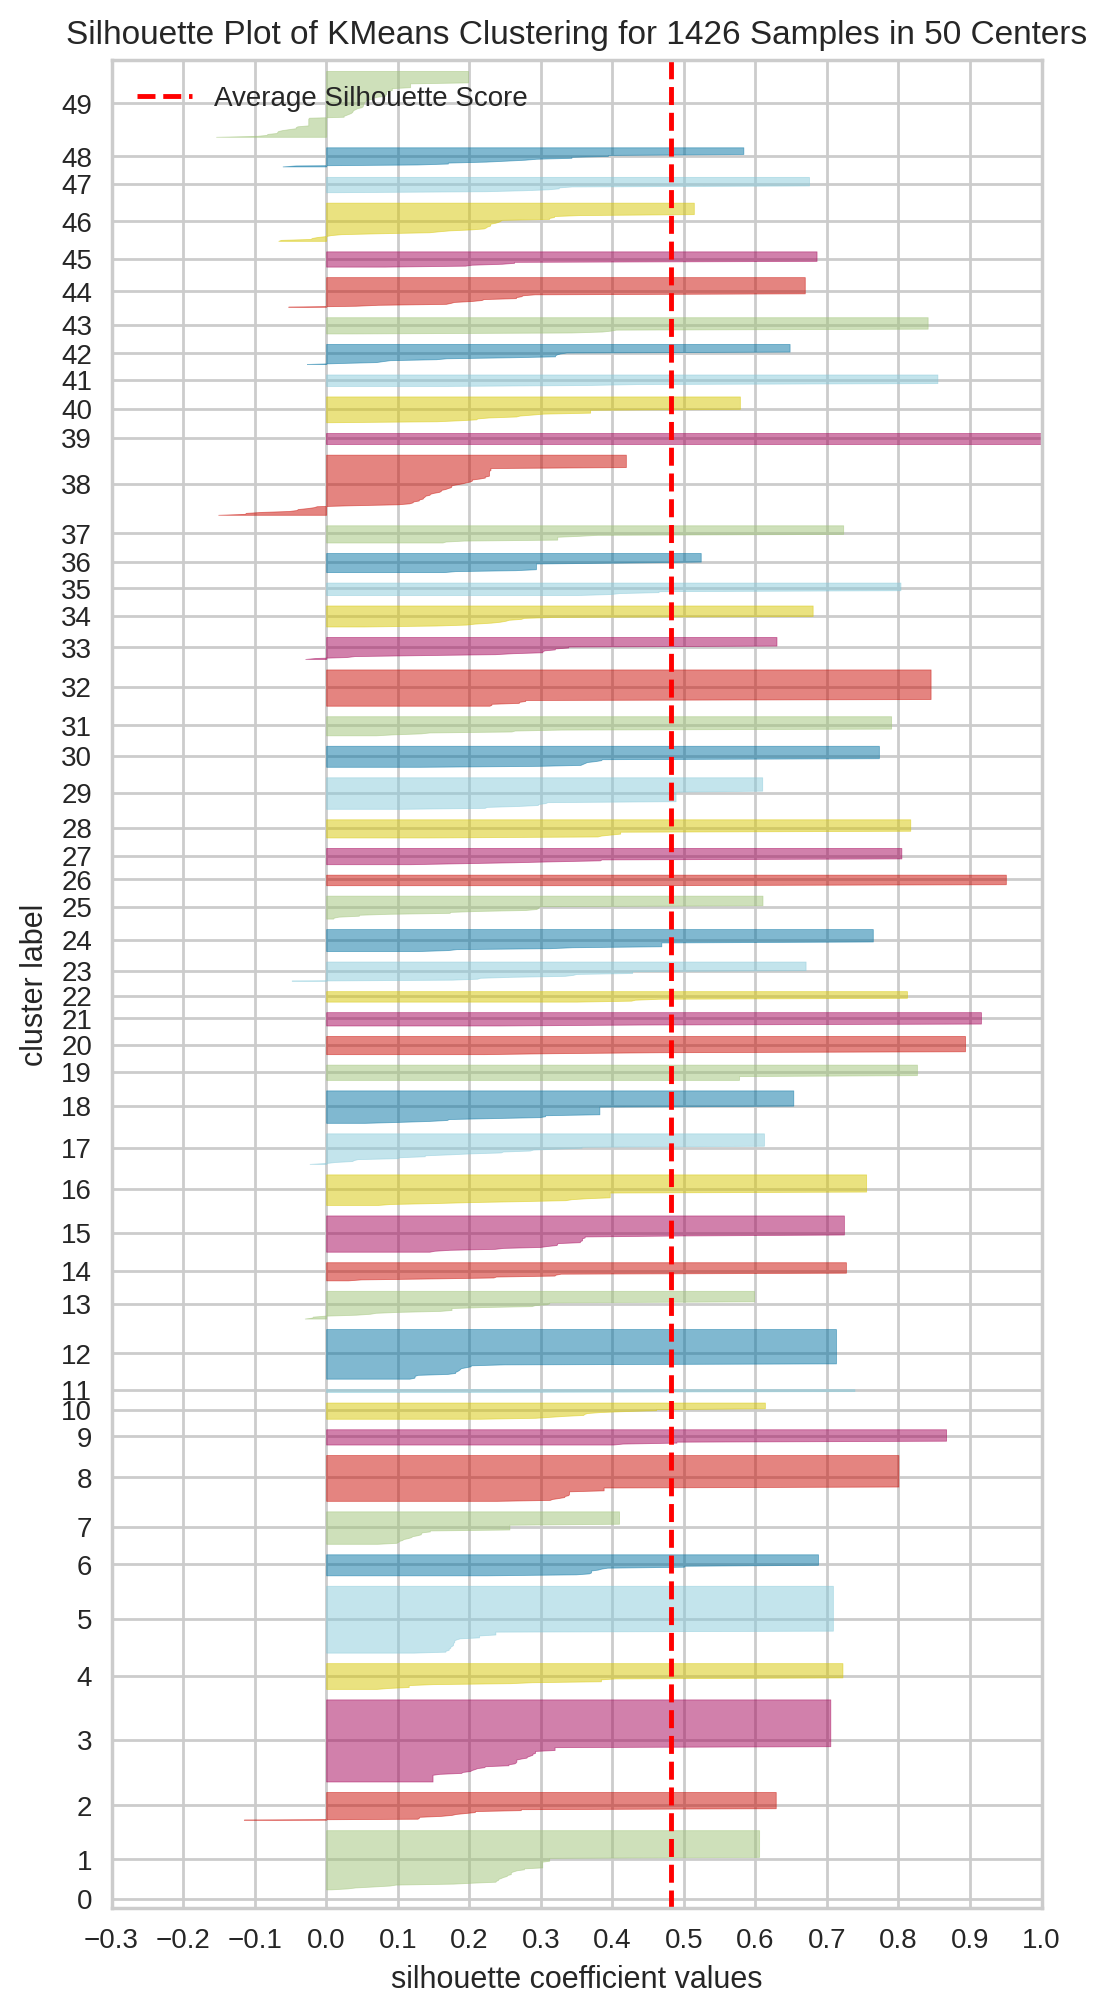

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1426 Samples in 50 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# 예람 조교님 감사합니다
# -*- coding: utf-8 -*-
"""
Created on Thu May 16 15:36:00 2024

@author: dpfka
"""



# -*- coding: utf-8 -*-
"""
Created on Thu May 16 12:38:17 2024

@author: dpfka
"""

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('weekly_comments.xlsx')
df = df.dropna().reset_index(drop=True)

print(df.shape)
#print(df)
#%%
from sklearn.feature_extraction.text import CountVectorizer

#벡터화
vectorizer = CountVectorizer(
    analyzer='word',
    tokenizer = None,
    preprocessor = None,
    stop_words = None,
    ngram_range=(2, 6),
    min_df = 10,
    max_features = 2000
    )

feature_vector = vectorizer.fit_transform(df['comment'])
print(feature_vector.shape)

vocab = vectorizer.get_feature_names_out()
#print(len(vocab))
#print(vocab[:5])

print(pd.DataFrame(feature_vector[:10].toarray(), columns=vocab))

#%%
 # tf-idf
from sklearn.feature_extraction.text import TfidfTransformer
tfidftrans = TfidfTransformer(smooth_idf = False)
feature_tfidf = tfidftrans.fit_transform(feature_vector)
tfidf_freq = pd.DataFrame(feature_tfidf.toarray(), columns = vocab)

#%%
df_tfidf = pd.DataFrame(tfidf_freq.sum())
print(df_tfidf.sort_values(by=0, ascending=False))
#%%
skip = True
from sklearn.cluster import KMeans
from tqdm import trange

#군집 개수 시험
start = 10
end = 100
#%%
if not skip:
    #k-means로 군집화(비지도학습)
    # 몇 개의 군집으로 나누는 게 적절할지 보기1 : elbow method


    inertia = []



    for i in trange(start, end):
        kmeans = KMeans(n_clusters=i, random_state=42, n_init=20)
        kmeans.fit(feature_tfidf)
        inertia.append(kmeans.inertia_)


    plt.plot(range(start, end), inertia)
    plt.title('comparison of num of clusters')

    #%%
    # 몇 개의 군집으로 나누는 게 적절할지 보기2
    from yellowbrick.cluster import KElbowVisualizer

    KElbowM = KElbowVisualizer(KMeans(random_state=42, n_init=20), k=(start, end))
    KElbowM.fit(feature_tfidf.toarray())
    KElbowM.show()

#%%
# k == 로 군집화

k = 50
final_kmeans = KMeans(n_clusters=k, random_state=42, n_init=20) #MiniBatchKMeans(n_clusters = 5, random_state=42, n_init = 20)
final_kmeans.fit(feature_tfidf)
prediction = final_kmeans.predict(feature_tfidf)

df["cluster"] = prediction
#%%
#군집화 결과 출력
#j번째 군집
j = 2
print(prediction.shape)
print(df[df['cluster'] == j])
#%%
# 실루엣 계수 분석
# 군집 내에선 가깝고, 군집 간은 멀어야 잘 된 것
from yellowbrick.cluster import SilhouetteVisualizer
#0 포함 출력
%config InlineBackend.figure_format = 'retina' #그래프quality향상
visualizer = SilhouetteVisualizer(final_kmeans, colors='yellowbrick', size=(600,1200))

filtered_data = feature_tfidf[final_kmeans.labels_ != 0]


visualizer.fit(feature_tfidf.toarray())
visualizer.show()

#0 제외 출력
visualizer = SilhouetteVisualizer(final_kmeans, colors='yellowbrick', size=(600,1200))

visualizer.fit(filtered_data.toarray())
visualizer.show()

# **MERS DATA Topic Modeling Codes**

**추가적인 내용이므로 반드시 숙지해야하는 내용은 아닙니다! 실행하실때 앞서서 실시하신 메르스 코드 아래로 이동해서 바로 실행하시면 제일 좋습니다!**

In [ ]:
df = pd.read_excel('mers_20150501~20150531.xlsx') # 메르스 데이터를 데이터 프레임으로 불러들이기

In [ ]:
import re
def clean_str(text):
    if text == np.nan:
        return ''
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '\n'         #줄바꿈제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    return text

In [ ]:
# 용량이 작은 버젼으로 연습하고 싶다면 다시 샘플링 하신 후 토픽 모델링을 하셔도 됩니다!
# 단 전체 데이터로 실행했을때에 비해 정확도가 떨어집니다!
df = df.sample(5000) #5000개만 샘플링하기

In [ ]:
from gensim import corpora, models
import gensim

In [ ]:
dictionary = corpora.Dictionary(noun_texts)
corpus     = [dictionary.doc2bow(text) for text in noun_texts] #각문장에 각 단어가 몇번 사용되었는지

In [ ]:
len(dictionary), len(corpus), len(noun_texts)

(3069, 4919, 4919)

In [ ]:
#주어진 토픽수로 LDA학습 시키기
ldamodel=gensim.models.ldamodel.LdaModel(corpus,
                                         num_topics=10,
                                         id2word=dictionary)

In [ ]:
ldamodel.print_topics(num_words=20)

[(0,
  '0.032*"환자" + 0.027*"유언비어" + 0.026*"중동" + 0.026*"신고" + 0.020*"방문" + 0.020*"의심" + 0.018*"지역" + 0.017*"발열" + 0.016*"정부" + 0.016*"관련" + 0.016*"발생" + 0.013*"국민" + 0.012*"박근" + 0.011*"문의" + 0.011*"확인" + 0.010*"세월" + 0.010*"조치" + 0.009*"경우" + 0.009*"중국" + 0.009*"관리"'),
 (1,
  '0.040*"기사" + 0.037*"접촉" + 0.035*"발표" + 0.026*"전염" + 0.023*"관련" + 0.022*"금지" + 0.020*"살인" + 0.020*"촌철" + 0.018*"정확" + 0.017*"리플" + 0.016*"환자" + 0.015*"질병" + 0.015*"드립" + 0.015*"미국" + 0.014*"예방" + 0.014*"부탁" + 0.014*"증상" + 0.013*"공기" + 0.012*"수칙" + 0.012*"센터"'),
 (2,
  '0.046*"바이러스" + 0.021*"감염" + 0.019*"탄저균" + 0.016*"조심" + 0.016*"접촉" + 0.014*"김치" + 0.013*"수원" + 0.013*"백신" + 0.011*"지금" + 0.011*"환자" + 0.011*"한국" + 0.010*"감염자" + 0.009*"진자" + 0.009*"치료법" + 0.009*"치사율" + 0.009*"의료" + 0.009*"생각" + 0.009*"최근" + 0.008*"미국" + 0.008*"중요"'),
 (3,
  '0.123*"환자" + 0.039*"속보" + 0.037*"추가" + 0.036*"발생" + 0.035*"의심" + 0.030*"뉴스" + 0.025*"감염" + 0.025*"격리" + 0.024*"벌금" + 0.019*"정부" + 0.018*"신고" + 0.016*"중국" + 0.015*"의료진" + 0.014*"

In [ ]:
ldamodel.get_topic_terms(0)

[(13, 0.03170135),
 (89, 0.027035695),
 (153, 0.02625264),
 (8, 0.026011221),
 (137, 0.020346776),
 (145, 0.019777117),
 (347, 0.018454237),
 (383, 0.017436495),
 (49, 0.016123481),
 (42, 0.01583362)]

In [ ]:
ldamodel.get_document_topics(corpus)[20]

[(3, 0.1675601), (4, 0.15700167), (6, 0.14696446), (7, 0.4983619)]

In [ ]:
noun_texts[20]

['환자',
 '어제',
 '추가',
 '병자',
 '보건',
 '당국',
 '자기',
 '격리',
 '대상',
 '제외',
 '사람',
 '부하',
 '직원',
 '국민',
 '통치',
 '보건',
 '복지',
 '수장',
 '전부']

In [ ]:
perplexity_values=[]
for i in tqdm(np.arange(2,100,5)):
  ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
  perplexity_values.append(ldamodel.log_perplexity(corpus))


100%|██████████| 20/20 [01:10<00:00,  3.50s/it]


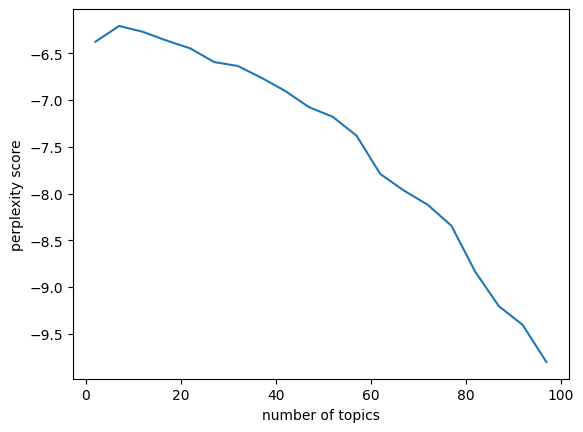

In [ ]:
import matplotlib
from matplotlib import pyplot as plt
x=np.arange(2,100,5)
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplexity score")
plt.show()